## Zadanie 0

In [1]:
import numpy as np
from sklearn import datasets
from scipy.stats import mode
import scipy as sp
from random import shuffle

def dist(x, y):
    return np.sqrt(((x-y).T).dot (x-y))

def knn(query, data, labels, k):
    dists = sp.spatial.distance.cdist(query, data, 'euclidean')
#     dists = map(lambda d: (dist(query, d[0]), d[1]), data)
    nearest = np.argsort(dists)
    labels = labels[nearest].T
    result = sp.stats.mode(labels[:k, :])
    return result[0]

def correctness(teach, teach_labels, test, test_labels, k):
    results = knn(test, teach, teach_labels, k)
    correct = np.sum(results == test_labels)
    correctness = 100.0 * correct / (test.shape[0])
    return correctness

def check_knn(data, teach_on, k=5):
    # shuffle data
    shuffle(data)
    data = np.array(data)
    # split to teaching and testing sets
    query = data[teach_on:, 0]
    query_labels = data[teach_on:, 1]
    query = np.concatenate(query).reshape((query.shape[0], -1))
    teach = data[:teach_on, 0]
    teach_labels = data[:teach_on, 1]
    teach = np.concatenate(teach).reshape((teach.shape[0], -1))
    # count knn and check results
    crr = correctness(teach, teach_labels, query, query_labels, k)
    print('Algorithm trained on {} samples with k={} is {}% correct'.format(teach_on, k, crr))
    
def cross_validation(data, parts, k=5):
    shuffle(data)
    data = np.array(data)
    chunk_size = data.shape[0] / parts
    split_data = []
    for p in np.arange(parts - 1):
        split_data.append(data[p * chunk_size:(p+1) * chunk_size])
    split_data.append(data[(parts - 1) * chunk_size:])
    split_data = np.array(split_data)
    corr = 0.0
    for i in np.arange(parts):
        test = split_data[i][:, 0]
        test_labels = split_data[i][:, 1]
        teach = np.concatenate(split_data[np.arange(parts)!=i])
        teach_labels = teach[:, 1]
        teach = teach[:, 0]
        teach = np.concatenate(teach).reshape((teach.shape[0], -1))
        test = np.concatenate(test).reshape((test.shape[0], -1))
        
        c = correctness(teach, teach_labels, test, test_labels, k)
        print('Algorithm tested on {}th part  is {}% correct'.format(i, c))       
        corr += c
    print('Average correctness of algorithm for cross validation is {}%'.format(corr / parts))
#         print(test_labels)

In [2]:
#### knn on iris ####
iris = datasets.load_iris() 
data = []
targets = iris.target
for i in range(0, len(iris.data)):
    data.append((iris.data[i], targets[i]))
    
## run knn ##
for i in np.arange(5):
    check_knn(data, 100)
    
## run cross validation ##
cross_validation(data, 10)

Algorithm trained on 100 samples with k=5 is 96.0% correct
Algorithm trained on 100 samples with k=5 is 96.0% correct
Algorithm trained on 100 samples with k=5 is 92.0% correct
Algorithm trained on 100 samples with k=5 is 98.0% correct
Algorithm trained on 100 samples with k=5 is 96.0% correct
Algorithm tested on 0th part  is 100.0% correct
Algorithm tested on 1th part  is 93.3333333333% correct
Algorithm tested on 2th part  is 100.0% correct
Algorithm tested on 3th part  is 100.0% correct
Algorithm tested on 4th part  is 100.0% correct
Algorithm tested on 5th part  is 86.6666666667% correct
Algorithm tested on 6th part  is 100.0% correct
Algorithm tested on 7th part  is 93.3333333333% correct
Algorithm tested on 8th part  is 100.0% correct
Algorithm tested on 9th part  is 100.0% correct
Average correctness of algorithm for cross validation is 97.3333333333%


In [3]:
#### knn on handwritten (preprocessed) ####
import csv
def read_handwritten(filename):
    with open(filename, 'r') as f:
        data = np.genfromtxt(filename, delimiter=',')
    labels = data[:, -1]
    data = data[:, :-1]
    return data, labels
handwritten_data = read_handwritten('/home/ruda/workspace/school/eksplo/list5/optdigits.tra')
data = []
for i in np.arange(handwritten_data[0].shape[0]):
    data.append((handwritten_data[0][i], handwritten_data[1][i]))
# print(data)
for k in (5, 10, 15):
    check_knn(data, 3000, k)
    
## run cross validation ##
cross_validation(data, 10)

Algorithm trained on 3000 samples with k=5 is 98.0558930741% correct
Algorithm trained on 3000 samples with k=10 is 98.177399757% correct
Algorithm trained on 3000 samples with k=15 is 96.8408262454% correct
Algorithm tested on 0th part  is 98.6910994764% correct
Algorithm tested on 1th part  is 99.2146596859% correct
Algorithm tested on 2th part  is 98.6910994764% correct
Algorithm tested on 3th part  is 99.4764397906% correct
Algorithm tested on 4th part  is 97.9057591623% correct
Algorithm tested on 5th part  is 97.1204188482% correct
Algorithm tested on 6th part  is 99.2146596859% correct
Algorithm tested on 7th part  is 98.4293193717% correct
Algorithm tested on 8th part  is 98.4293193717% correct
Algorithm tested on 9th part  is 98.1818181818% correct
Average correctness of algorithm for cross validation is 98.5354593051%


## Skrypt z zajęć:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn import datasets
# stworzenie drzewa klasyfikacyjnego
iris = datasets.load_iris()


# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y = data['species']
X = data.drop('species', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)
          
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf iris.dot -o iris.pdf

with open("/home/ruda/workspace/school/eksplo/list5/iris.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

1.0

## Zadanie 1

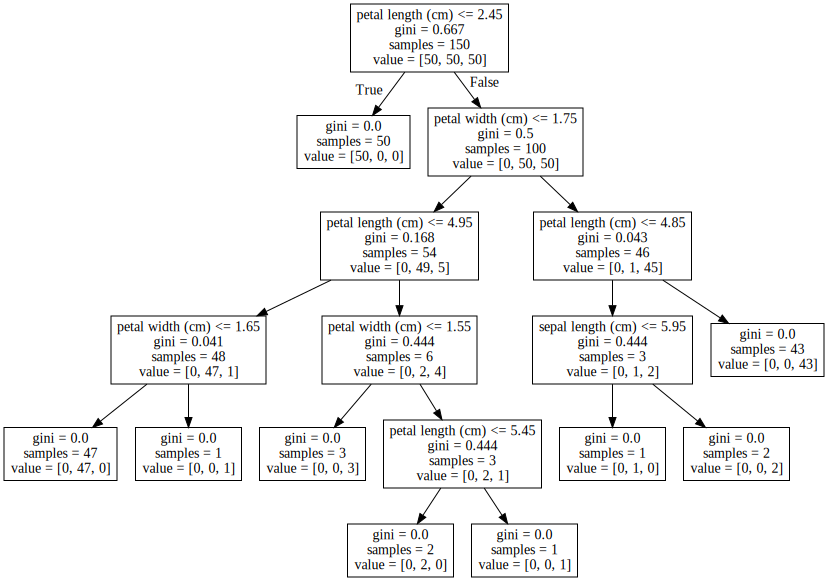

In [33]:
import graphviz as gv
import os

def show_dot(filename):
    f = open(filename, 'r')
    dot = f.read()
    return gv.Source(dot)
    
show_dot('/home/ruda/workspace/school/eksplo/list5/iris.dot')

In [39]:
# wczytanie zestawu danych z pliku
titanic = pd.read_csv('/home/ruda/workspace/school/eksplo/list5/titanic.csv')

# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic = titanic.dropna()

# zmiana kodowania atrybutów nominalnych w zestawie danych
titanic['Sex'] = pd.Categorical.from_array(titanic['Sex']).codes
titanic['Embarked'] = pd.Categorical.from_array(titanic['Embarked']).codes

# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
titanic_y = titanic['Survived']
titanic_X = titanic.drop('Survived', axis = 1)

/home/ruda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
/home/ruda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  # Remove the CWD from sys.path while we load stuff.


In [83]:
# stworzenie drzewa klasyfikacyjnego
titanic_gini = tree.DecisionTreeClassifier()
titanic_gini = titanic_gini.fit(titanic_X, titanic_y)

titanic_gini_file = "/home/ruda/workspace/school/eksplo/list5/titanic_gini.dot"
with open(titanic_gini_file, "w") as f:
    tree.export_graphviz(titanic_gini, out_file=f, feature_names=titanic_X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
print(titanic_gini.score(titanic_X, titanic_y))

# show_dot(titanic_gini_file)

0.98595505618


In [84]:
# stworzenie drzewa klasyfikacyjnego
titanic_entropy = tree.DecisionTreeClassifier(criterion='entropy')
titanic_entropy = titanic_entropy.fit(titanic_X, titanic_y)

titanic_entropy_file = "/home/ruda/workspace/school/eksplo/list5/titanic_entropy.dot"
with open(titanic_entropy_file, "w") as f:
    tree.export_graphviz(titanic_entropy, out_file=f, feature_names=titanic_X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
print(titanic_entropy.score(titanic_X, titanic_y))

# show_dot(titanic_entropy_file)

0.98595505618


In [85]:
train_samples = len(titanic_X) * 2 / 3
# stworzenie drzewa klasyfikacyjnego
titanic_gini_train = tree.DecisionTreeClassifier()
titanic_gini_train = titanic_gini_train.fit(titanic_X[:train_samples], titanic_y[:train_samples])

titanic_gini_train_file = "/home/ruda/workspace/school/eksplo/list5/titanic_gini_train.dot"
with open(titanic_gini_train_file, "w") as f:
    tree.export_graphviz(titanic_gini_train, out_file=f, feature_names=titanic_X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
print(titanic_gini_train.score(titanic_X[train_samples:], titanic_y[train_samples:]))

# show_dot(titanic_gini_train_file)

0.764705882353


In [99]:
train_samples = len(titanic_X) * 2 / 3
# stworzenie drzewa klasyfikacyjnego
titanic_entropy_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
titanic_entropy_train = titanic_entropy_train.fit(titanic_X[:train_samples], titanic_y[:train_samples])

titanic_entropy_train_file = "/home/ruda/workspace/school/eksplo/list5/titanic_entropy_train.dot"
with open(titanic_entropy_train_file, "w") as f:
    tree.export_graphviz(titanic_entropy_train, out_file=f, feature_names=titanic_X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
print(titanic_entropy_train.score(titanic_X[train_samples:], titanic_y[train_samples:]))

# show_dot(titanic_gini_train_file)

0.836134453782


0.768907563025


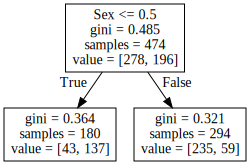

In [102]:
train_samples = len(titanic_X) * 2 / 3
# stworzenie drzewa klasyfikacyjnego
titanic_gini_train1 = tree.DecisionTreeClassifier(max_depth = 1)
titanic_gini_train1 = titanic_gini_train1.fit(titanic_X[:train_samples], titanic_y[:train_samples])

titanic_gini_train_file1 = "/home/ruda/workspace/school/eksplo/list5/titanic_gini_train1.dot"
with open(titanic_gini_train_file1, "w") as f:
    tree.export_graphviz(titanic_gini_train1, out_file=f, feature_names=titanic_X.columns)
    
# ocena stworzonego klasyfikatora na danych uczących
print(titanic_gini_train1.score(titanic_X[train_samples:], titanic_y[train_samples:]))

show_dot(titanic_gini_train_file1)

In [120]:
train_samples = len(titanic_X) * 2 / 3

# show_dot(titanic_entropy_train_file1)
for i in np.arange(1, 6):
    titanic_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    titanic_gini = titanic_gini.fit(titanic_X[:train_samples], titanic_y[:train_samples])

    titanic_gini_file = "/home/ruda/workspace/school/eksplo/list5/titanic_gini.dot"
    with open(titanic_gini_file, "w") as f:
        tree.export_graphviz(titanic_gini, out_file=f, feature_names=titanic_X.columns)

    # ocena stworzonego klasyfikatora na danych uczących
    score = titanic_gini.score(titanic_X[train_samples:], titanic_y[train_samples:])
    print('Max depth: {}, score: {}'.format(i, score))

Max depth: 1, score: 0.768907563025
Max depth: 2, score: 0.806722689076
Max depth: 3, score: 0.836134453782
Max depth: 4, score: 0.819327731092
Max depth: 5, score: 0.81512605042


In [112]:
train_samples = len(titanic_X) * 2 / 3

# show_dot(titanic_entropy_train_file1)
for i in np.arange(1, 6):
    titanic_entropy_train1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    titanic_entropy_train1 = titanic_entropy_train1.fit(titanic_X[:train_samples], titanic_y[:train_samples])

    titanic_entropy_train_file1 = "/home/ruda/workspace/school/eksplo/list5/titanic_entropy_train1.dot"
    with open(titanic_entropy_train_file1, "w") as f:
        tree.export_graphviz(titanic_entropy_train1, out_file=f, feature_names=titanic_X.columns)

    # ocena stworzonego klasyfikatora na danych uczących
    score = titanic_entropy_train1.score(titanic_X[train_samples:], titanic_y[train_samples:])
    print('Max depth: {}, score: {}'.format(i, score))

Max depth: 1, score: 0.768907563025
Max depth: 2, score: 0.806722689076
Max depth: 3, score: 0.836134453782
Max depth: 4, score: 0.806722689076
Max depth: 5, score: 0.802521008403


## Zadanie 2